For this assignment I will be adapting code from the book as well as provided notebooks from the authors website.

In this assignment, you will be reproducing the models described in the examples from chapter three of Deep Learning with Python.
You will use that code to create a Luigi pipeline that trains the model, uses the model to perform model validation, and output model metrics.

In [56]:
print("Checking to see if my GPU is enabled for tensorflow.")

import tensorflow as tf

if tf.test.gpu_device_name():
    print('GPU RTX 3090 location: {}'.format(tf.test.gpu_device_name()))
else:
   print("GPU not installed")

Checking to see if my GPU is enabled for tensorflow.
GPU RTX 3090 location: /device:GPU:0


Extra Work if you wish you can skip down to assignment 5.1

In [57]:
# 3.1
print("\n--- 3.1 ---\n")
# building a tensor filled with ones or zeros
x = tf.ones(shape=(2, 1))
print(x)
x = tf.zeros(shape=(2, 1))
print(x)

# 3.2
print("\n--- 3.2 ---")
print("--- Random Distribution ---\n")
# tensors with a normal distribution
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

# Uniform distribution
print("\n--- Uniform distribution ---\n")
x = tf.random.uniform(shape=(3,1), minval=0., maxval=1.)
print(x)

# 3.3
print("\n--- 3.3 ---")
print("--- Can't assign values directly to a Tensor---\n")

# Tensors have variables associated with them that can be changed
# But you cant just assign values to a Tensor
print("tf.Variable is the key to handle changing tensors")

# 3.5
print("\n--- 3.5 ---")
print("--- Can't create values directly to a Tensor---\n")
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

# 3.6
print("\n--- 3.6 ---")
print("--- assign values directly to a Tensor---\n")
v.assign(tf.ones((3,1)))
print(v)

# 3.7
print("\n--- 3.7 ---")
print("--- changing one of the values ---\n")
c = v[0,0].assign(3.)
print(c)

# 3.8
print("\n--- 3.8 ---")
print("--- adding and subtracting ---\n")
c = v.assign_add(tf.ones((3,1)))
print(c)

# 3.9
print("\n--- 3.9 ---")
print("--- Math Examples ---\n")

# kind of silly that they chose ones for these calculations.
a = tf.ones((2, 2))
print(a)
b = tf.square(a)
print(b)
c = tf.sqrt(a)
print(c)
d = b + c
print(d)
e = tf.matmul(a, b)
print(e)
e *= d
print(e)

# interesting that it changes these without assignment

# Gradient Tape Idea

# 3.11
print("\n--- 3.11 ---")
print("--- Gradient Tape ---\n")
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
    gradient = tape.gradient(result, input_const)

# 3.12
print("\n--- 3.12 ---")
print("--- Gradient Tape second derivative ---\n")

# set time to time 0
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9*time**2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(speed)
print(acceleration)


--- 3.1 ---

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)

--- 3.2 ---
--- Random Distribution ---

tf.Tensor(
[[-0.70285136]
 [-2.1485696 ]
 [-0.85698885]], shape=(3, 1), dtype=float32)

--- Uniform distribution ---

tf.Tensor(
[[0.30978155]
 [0.97238123]
 [0.74339974]], shape=(3, 1), dtype=float32)

--- 3.3 ---
--- Can't assign values directly to a Tensor---

tf.Variable is the key to handle changing tensors

--- 3.5 ---
--- Can't create values directly to a Tensor---

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.31377497],
       [-2.3469641 ],
       [ 0.6612223 ]], dtype=float32)>

--- 3.6 ---
--- assign values directly to a Tensor---

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

--- 3.7 ---
--- changing one of the values ---

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
   

We are building some x y coordinates

[[ 2.3250437   3.6671596 ]
 [ 0.22189711  1.9548998 ]
 [-0.31649345  2.6303108 ]
 [-0.8222753   3.763751  ]
 [-0.60881144  3.0984123 ]]


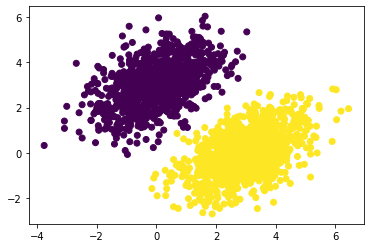

Loss at step 0: 2.3156
Loss at step 1: 0.4039
Loss at step 2: 0.1641
Loss at step 3: 0.1265
Loss at step 4: 0.1144
Loss at step 5: 0.1062
Loss at step 6: 0.0990
Loss at step 7: 0.0925
Loss at step 8: 0.0865
Loss at step 9: 0.0811
Loss at step 10: 0.0762
Loss at step 11: 0.0718
Loss at step 12: 0.0677
Loss at step 13: 0.0640
Loss at step 14: 0.0606
Loss at step 15: 0.0575
Loss at step 16: 0.0547
Loss at step 17: 0.0521
Loss at step 18: 0.0498
Loss at step 19: 0.0477
Loss at step 20: 0.0458
Loss at step 21: 0.0440
Loss at step 22: 0.0424
Loss at step 23: 0.0409
Loss at step 24: 0.0396
Loss at step 25: 0.0384
Loss at step 26: 0.0373
Loss at step 27: 0.0363
Loss at step 28: 0.0354
Loss at step 29: 0.0345


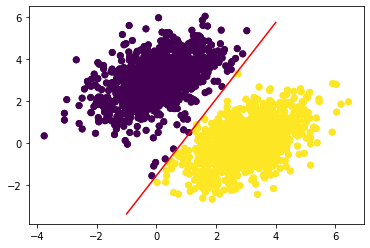

In [58]:
# Building a linear classifier
import numpy as np

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0,3], cov=[[1,0.5],[0.5,1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3,0], cov=[[1,0.5],[0.5,1]], size=num_samples_per_class)

# vertical stacking my positive and negative samples
inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)
print("We are building some x y coordinates\n")
print(inputs[:5])

# building targets
targets = np.vstack((np.zeros((num_samples_per_class,1), dtype='float32'), np.ones((num_samples_per_class,1), dtype='float32')))

#plotting the data
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:,1],c=targets[:,0])
plt.show()

# the goal: prediction = W*input+b
# basically a linear regression line

input_dim = 2
ouput_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, ouput_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(ouput_dim,)))

# tying it all together
def model(inputs):
    return tf.matmul(inputs,W) + b

def square_loss(targets, predictions):
    per_samples_losses = tf.square(targets-predictions)
    return tf.reduce_mean(per_samples_losses)

learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W* learning_rate)
    b.assign_sub(grad_loss_wrt_b*learning_rate)
    return loss

for step in range(30):
    loss = training_step(inputs, targets)
    print('Loss at step %d: %.4f' % (step, loss))

predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

# this is really incredible.
# I need to work more with gradient tape.

5.1 Assignment
Implement the movie review classifier found in section 3.4 of Deep Learning with Python as a Luigi workflow.

In [59]:
import keras
keras.__version__

'2.4.3'

In [60]:
# This is one of the classic keras datasets

from keras.datasets import imdb

# training data is the words in the reviews encoded
# The labels are lists with ones and zeros for positive and negative reviews.
# So this must be sentiment analysis for NLP.

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/totennacht/venv/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/totennacht/venv/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated

In [61]:
print("Here is the first 10 items in my list.")
train_data[0][:10]

Here is the first 10 items in my list.


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [62]:
print("Here are 10 labels showing positive and negative reviews.")
train_labels[:10]

Here are 10 labels showing positive and negative reviews.


array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [63]:
# here we are setting boundries we have no reason to exceed the 10,000 word limit that we started with.

max([max(sequence) for sequence in train_data])

9999

In [64]:
# an inverse function that decodes our data to get the words

# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

print("Here is a sample review")
print(decoded_review)

Here is a sample review
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they

In [65]:
# here we are going to vectorize our data
# the book also offered the solution that we could one hot encode the data
# We have to convert it to tensors

# interesting the author builds matrices with zeros in it quite often.
# He did that when working with the linear regression problem above.
# I cant tell if its just to make placeholders for data due to how tensorflow works or not.

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [66]:
# Vectorized samples
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [67]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [68]:
# hmm cant tell the difference I think he just made them floats instead of ints
# maybe tensorflow does not like integers

print(y_train)

[1. 0. 0. ... 0. 1. 0.]


In [69]:
from keras import models
from keras import layers

# This looks very similar to a network I built for a project last semester.

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# its really strange that they are calling the compile function over and over again
# I opted to choose their more detailed optimization over the others.

from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [70]:
# Validation data is set asside for use later. It is used to simulate future data.

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [71]:
# here we are fitting our data
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 15ms/step - loss: 0.6009 - binary_accuracy: 0.6950 - val_loss: 0.3920 - val_binary_accuracy: 0.8714
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3285 - binary_accuracy: 0.9022 - val_loss: 0.3437 - val_binary_accuracy: 0.8600
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2310 - binary_accuracy: 0.9275 - val_loss: 0.2820 - val_binary_accuracy: 0.8892

In [72]:
# This helps us evaluate how well our model is performing.
# I believe I used it last semester to build graphs.


history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


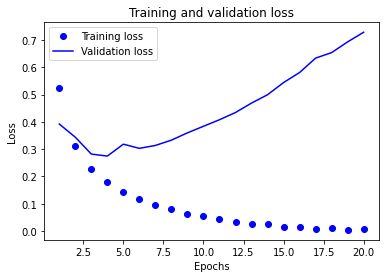

In [73]:
# Yep and here are the graphs.


import matplotlib.pyplot as plt

'''
acc = history.history['acc']
val_acc = history.history['binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
'''
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# interesting as we gain more epochs in this case we become more and more over fitted. So the model is not performing as well as we would like on validation data
plt.show()

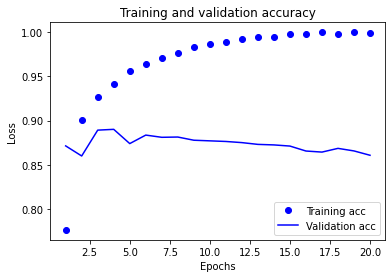

In [74]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [75]:
# Here I am training the model but stopping after 4 epochs
# If I recall from last semester there was a way to stop early to avoid over fitting and save time on training.

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=4,
          batch_size=512)

results = model.evaluate(x_test, y_test)



Epoch 1/4
49/49 [==============================] - 0s 5ms/step - loss: 0.5600 - accuracy: 0.7485
Epoch 2/4
49/49 [==============================] - 0s 4ms/step - loss: 0.2795 - accuracy: 0.9108

In [76]:
# predicting based on new info

# the use of the sigmoid function at the end makes these probabilities between 1 and 0
model.predict(x_test)

# The book talks about different settings
# I think I would try gridsearchcv to test these out if I had time.

array([[0.21323206],
       [0.99970394],
       [0.8383415 ],
       ...,
       [0.11108381],
       [0.07800943],
       [0.43988746]], dtype=float32)

In [77]:
# testing out other setups

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=4,
          batch_size=512)

results = model.evaluate(x_test, y_test)

# Changed binary_crossentropy to mse
# 1s 969us/step - loss: 0.1016 - accuracy: 0.8627
# accuracy was slightly worse on mse

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=4,
          batch_size=512)

results = model.evaluate(x_test, y_test)

# really strange I sometimes have to restart pycharm I think the kernel is dying after re running some of these. 
# before restart 0s 1ms/step - loss: -742.1362 - accuracy: 0.0467
# After restart 1s 1ms/step - loss: 0.3160 - accuracy: 0.8801
# thats crazy right?

Epoch 1/4
49/49 [==============================] - 0s 4ms/step - loss: 0.1879 - accuracy: 0.7517
Epoch 2/4
49/49 [==============================] - 0s 4ms/step - loss: 0.0864 - accuracy: 0.9097

5.2 Assignment

Implement the news classifier found in section 3.5 of Deep Learning with Python as a Luigi workflow.


In [78]:
# download and run reuters dataset

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/home/totennacht/venv/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/totennacht/venv/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [79]:
# checking the size of my training set.
print(("Training data length: {}".format(len(train_data))))
print(("Test data data length: {}".format(len(test_data))))

# As we can see the setup is similar to the last dataset the difference will be with the target vectors
# I suspect they wont be binary like last time
print(train_data[10])

Training data length: 8982
Test data data length: 2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [80]:
# with a little dictionary magic we can get back to the origional message
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in    train_data[0]])
print(decoded_newswire)
print("We can also print the indexes of the label for example:")
print(train_labels[10])

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
We can also print the indexes of the label for example:
3


In [81]:
# prepping the data
# like last time we need to vectorize the data so the network can handle it

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)


In [82]:
# One hot encoding for our labels
# This could also be done using a library
# I am going to leave it this way because I want to get used to how he keeps building placeholders for his data


def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

# the keras way to do the same thing for reference

'''
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

'''

'\nfrom keras.utils.np_utils import to_categorical\n\none_hot_train_labels = to_categorical(train_labels)\none_hot_test_labels = to_categorical(test_labels)\n\n'

In [83]:
# Building our network
from keras import models
from keras import layers


# interesting the book made a point that they only had 46 features
# They chose 64 so that they could ensure that no features would be left out.
# I did not know that it worked that way.

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# he is going with rmsprop again earlier in the book he said this was a good default
# Though we do have options here for optimizers
# I am especially excited about building our own.

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Again he sets aside some data for validation.

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Let the training begin!!

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 11ms/step - loss: 3.0564 - accuracy: 0.3959 - val_loss: 1.6946 - val_accuracy: 0.6550
Epoch 2/20
16/16 [==============================] - 0s 6ms/step - loss: 1.4758 - accuracy: 0.6901 - val_loss: 1.2761 - val_accuracy: 0.7210
Epoch 3/20
16/16 [==============================] - 0s 6ms/step - loss: 1.0747 - accuracy: 0.7657 - val_loss: 1.1038 - val_accuracy: 0.7670
Epoch 4/20
16/16 [==============================] - 0s 6ms/step - loss: 0.8068 - accuracy: 0.8308 - val_loss: 0.9949 - val_accuracy: 0.7890

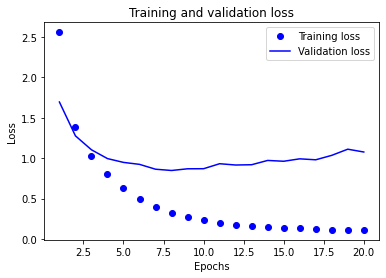

In [84]:
# plotting the results

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

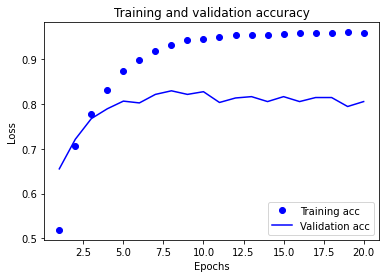

In [85]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [86]:
# The author notes that after 8 epochs we are over fitting
# So in this case he stops the training at 8 epochs

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)


print(results)

Epoch 1/8
16/16 [==============================] - 0s 11ms/step - loss: 3.2058 - accuracy: 0.3336 - val_loss: 1.7829 - val_accuracy: 0.6240
Epoch 2/8
16/16 [==============================] - 0s 6ms/step - loss: 1.5453 - accuracy: 0.6941 - val_loss: 1.3302 - val_accuracy: 0.7060
Epoch 3/8
16/16 [==============================] - 0s 6ms/step - loss: 1.1138 - accuracy: 0.7573 - val_loss: 1.1490 - val_accuracy: 0.7520
Epoch 4/8
16/16 [==============================] - 0s 6ms/step - loss: 0.8646 - accuracy: 0.8142 - val_loss: 1.0341 - val_accuracy: 0.7790

In [87]:
# so we beat a random classifier
# our model is better than guessing

import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18477292965271594

In [88]:
# making predictions
predictions = model.predict(x_test)
print(predictions)

[[5.8286987e-05 1.7950301e-04 5.1420237e-05 ... 2.0177198e-04
  1.1472590e-06 8.5664105e-06]
 [4.0833796e-03 6.5365136e-02 2.0603411e-02 ... 6.6478719e-04
  1.0740670e-03 2.0582394e-05]
 [1.9001696e-02 6.5982491e-01 1.0937620e-02 ... 7.6178333e-04
  1.0835418e-03 3.2488434e-04]
 ...
 [3.1306841e-05 1.8195937e-04 3.8604521e-05 ... 2.5961080e-04
  2.0543523e-06 1.3690166e-05]
 [4.1294214e-03 5.7683583e-02 6.8048537e-03 ... 2.7475064e-03
  4.7569073e-04 2.7834676e-04]
 [1.1904869e-02 5.0568414e-01 8.9647256e-02 ... 3.1205278e-04
  2.1664689e-04 4.6132503e-05]]


In [89]:
# so basically one prediction for each category
predictions.shape

(2246, 46)

In [90]:
# this is obvious but I suppose you could check this.
# We know that all of the probabilities added would have to be 1
np.sum(predictions[0])

0.9999999

In [91]:
# Interesting I would have guessed max not argmax
np.argmax(predictions[0])

3

In [92]:
# Here they switch the labels to tensors instead

y_train = np.array(train_labels)
y_test = np.array(test_labels)

# now that they are tensors he changes the loss function to sparse_categorical_crossentropy
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

# here he is making the point about what happens if you dont allow for enough room in the layers
# you can see they switched the second layer from 64 to 4

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

# We experience lower accuracy because it lost information that the other network had access to

Epoch 1/20
63/63 [==============================] - 0s 4ms/step - loss: 3.4441 - accuracy: 0.3459 - val_loss: 2.6209 - val_accuracy: 0.4150
Epoch 2/20
63/63 [==============================] - 0s 2ms/step - loss: 2.3567 - accuracy: 0.4592 - val_loss: 2.0445 - val_accuracy: 0.4780
Epoch 3/20
63/63 [==============================] - 0s 3ms/step - loss: 1.8083 - accuracy: 0.5201 - val_loss: 1.6540 - val_accuracy: 0.6500

In [93]:
# implementing some other tests
# smaller layers 32 units

y_train = np.array(train_labels)
y_test = np.array(test_labels)

# now that they are tensors he changes the loss function to sparse_categorical_crossentropy
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

# here he is making the point about what happens if you dont allow for enough room in the layers
# you can see they switched the second layer from 64 to 4

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

# on my test I got by changing the units to 32
# 0s 2ms/step - loss: 0.0985 - accuracy: 0.9613 - val_loss: 1.2422 - val_accuracy: 0.8090

Epoch 1/20
63/63 [==============================] - 0s 4ms/step - loss: 2.8410 - accuracy: 0.4008 - val_loss: 1.4987 - val_accuracy: 0.6690
Epoch 2/20
63/63 [==============================] - 0s 3ms/step - loss: 1.3044 - accuracy: 0.7066 - val_loss: 1.2018 - val_accuracy: 0.7390
Epoch 3/20
63/63 [==============================] - 0s 3ms/step - loss: 0.9685 - accuracy: 0.7839 - val_loss: 1.0474 - val_accuracy: 0.7740

In [94]:
# implementing some other tests
# larger layers 128 units

y_train = np.array(train_labels)
y_test = np.array(test_labels)

# now that they are tensors he changes the loss function to sparse_categorical_crossentropy
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

# here he is making the point about what happens if you dont allow for enough room in the layers
# you can see they switched the second layer from 64 to 4

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

# on my test I got by changing the units to 128
# 0s 2ms/step - loss: 0.0679 - accuracy: 0.9670 - val_loss: 1.4779 - val_accuracy: 0.7960
# Interestingly there was not a huge difference with changing to 128

Epoch 1/20
63/63 [==============================] - 0s 4ms/step - loss: 2.0988 - accuracy: 0.5741 - val_loss: 1.1031 - val_accuracy: 0.7690
Epoch 2/20
63/63 [==============================] - 0s 3ms/step - loss: 0.8488 - accuracy: 0.8159 - val_loss: 0.8857 - val_accuracy: 0.8110
Epoch 3/20
63/63 [==============================] - 0s 3ms/step - loss: 0.4796 - accuracy: 0.8990 - val_loss: 0.8620 - val_accuracy: 0.8180

In [95]:
# implementing some other tests
# larger layers 128 units

y_train = np.array(train_labels)
y_test = np.array(test_labels)

# now that they are tensors he changes the loss function to sparse_categorical_crossentropy
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

# here he is making the point about what happens if you dont allow for enough room in the layers
# you can see they switched the second layer from 64 to 4

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

# on my test I got by changing the units to 128
# 0s 3ms/step - loss: 0.0708 - accuracy: 0.9598 - val_loss: 2.2445 - val_accuracy: 0.7810
# Slightly less accurate when adding two more intermediate layers there was an increase in training time
# So basically I worked harder but did not get much value

Epoch 1/20
63/63 [==============================] - 0s 4ms/step - loss: 2.1541 - accuracy: 0.5221 - val_loss: 1.2143 - val_accuracy: 0.7230
Epoch 2/20
63/63 [==============================] - 0s 3ms/step - loss: 0.9449 - accuracy: 0.7810 - val_loss: 1.0599 - val_accuracy: 0.7510
Epoch 3/20
63/63 [==============================] - 0s 3ms/step - loss: 0.5634 - accuracy: 0.8602 - val_loss: 0.9673 - val_accuracy: 0.7930

5.3 Assignment

Implement the housing price regression model found in section 3.6 of Deep Learning with Python as a Luigi workflow.

In [96]:
# downloading the boston housing dataset
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [97]:
# considering the dimensions of the data
train_data.shape

(404, 13)

In [98]:
test_data.shape

(102, 13)

In [99]:
# median home values in thousands of dollars
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [100]:
# statistics normalizing the data
#
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

# building the network

from keras import models
from keras import layers

# they opted for MSE this time because they are using a regression formula.

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

import numpy as np

# building cross validation by hand.
# I don't think this is necessary since cross validation can be specified when building the model
# maybe sklearn gives that as an option we could use StratifiedKFold here

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [101]:
all_scores

[2.2112107276916504, 2.486182689666748, 2.8516571521759033, 2.2916481494903564]

In [102]:
np.mean(all_scores)

from keras import backend as K

# oh wow this is a nice function I did not know that we could clear the memory.

# Some memory clean-up
K.clear_session()

In [103]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [104]:
# now they are averaging the mae_histories
# I assume so they can smooth out the data a bit

average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

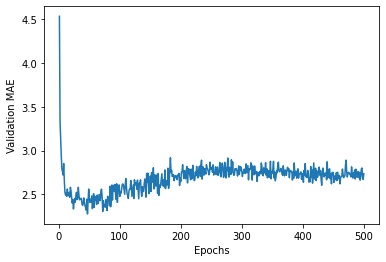

In [105]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

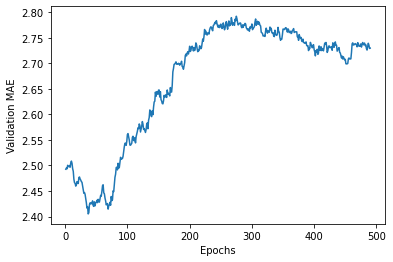

In [106]:
# funny like I said they are going to smooth the data out
# of course they just omitted the beginning of the plot so we can see the graph better

def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


In [107]:
# Again they look at the output and lower the number of epochs
# I imagine there is a better way to solve this
# maybe dropping layers could help with over fitting
# another option is to have it programmatically drop out after reaching a specific loss
# on the graph they see that 80 epochs is a good cutoff point
# but this seems more like an art than a science.

# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 825us/step - loss: 18.5808 - mae: 2.6634


In [108]:
test_mae_score

2.6633782386779785